# 作業 : (Kaggle)房價預測

# [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

# [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [110]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = './data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [111]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [112]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

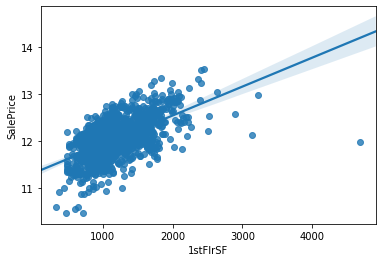

0.846643681071632

In [113]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

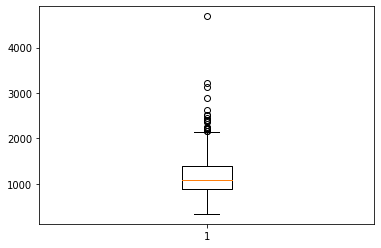

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [43]:
import matplotlib.pyplot as plt

x_sample = df['1stFlrSF'][:train_num]
plt.boxplot(x_sample)
plt.show()
x_sample.describe()

In [44]:
# Non-adjusted data
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.846643681071632

0.8735325987639803

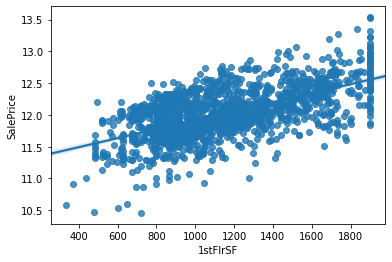

In [45]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
df2 = df
df2['1stFlrSF'] = df['1stFlrSF'][:train_num].clip(300, 1900)
sns.regplot(x=df2['1stFlrSF'], y=train_Y)

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df2)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

0.8824847573512615

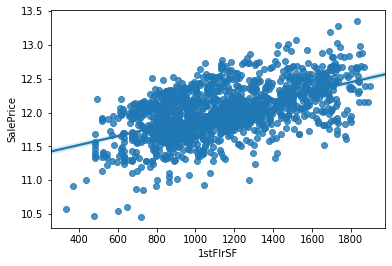

In [51]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
df3 = df
index_range = (df3['1stFlrSF']>300) & (df3['1stFlrSF']<1900)
df3 = df3[index_range]
train_Y =train_Y[index_range]
sns.regplot(x=df3['1stFlrSF'], y=train_Y)


# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df3)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

In [63]:
print(len(df[df['1stFlrSF']>1900]['1stFlrSF']), len(df['1stFlrSF']))

57 1460


In [67]:
df[df['1stFlrSF']<1900]['1stFlrSF'].sum()

1571401

In [68]:
df[df['1stFlrSF']>1900]['1stFlrSF'].sum()

126034

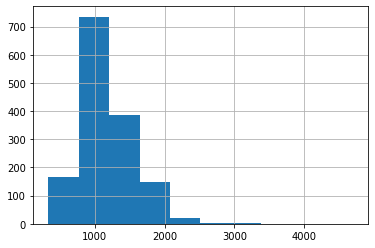

In [69]:
df['1stFlrSF'].hist()

0.8859445170456798

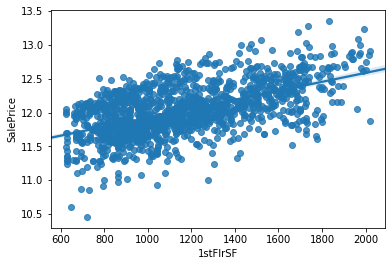

In [114]:
from scipy.stats.mstats import winsorize

# df_array = np.array(df['1stFlrSF'])
de_preprocessing = winsorize(df_array, limits=[0.025, 0.025])
df_convert = pd.DataFrame(de_preprocessing)

df4 = df 
df4_bottom, df_upper = int(df_convert.min()), int(df_convert.max())
index_range_2 = (df4['1stFlrSF']>df4_bottom) & (df4['1stFlrSF']<df_upper)
df4_cleaning = df4[index_range_2]
train_Y = train_Y[index_range_2]

sns.regplot(x=df4_cleaning['1stFlrSF'], y=train_Y)

train_X = MMEncoder.fit_transform(df4_cleaning)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

In [ ]:
"""
我認為會出現捨棄離群值比調整離群值好的原因如下:

首先，因為此題中的回歸模型不僅僅是以"1樓地板面積"來訓練模型，
而是以36種類型的自變數來進行訓練，所以當我們以調整"一樓地板面
積"的離群值來處理的話，我們僅僅改了36個變數中的其中一個，但是
，這些在"1樓地板面積"項目是離群值的樣本，或許這個樣本在其他35
個變數項目也會是離群值，顯示，在某項變數中是離群值的樣本個體，
很可能是個離群值個體，而不只是單單在某項變數中為離群值。
因此，當我們以捨棄離群值的方式處理時，我們不只將"1樓地板面積"
的離群值捨棄，我們更將同屬此樣本個體的其他35個"可能也同為離群"
值的變數也捨去，進而使得我們得出更高的準確率。
  
"""